<a href="https://colab.research.google.com/github/Jinukki/KJU/blob/master/LSTM2Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:

    %tensorflow_version 2.x  # %tensorflow_version only exists in Colab

except Exception:

    pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow.keras.datasets import imdb
(x_train_all, y_train_all), (x_test, y_test)=imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
  x_train_all[i]=[w for w in x_train_all[i] if w>2]

import numpy as np
np.random.seed(42)
random_index=np.random.permutation(25000)

x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]



In [0]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8, return_sequences=True))
model_lstm.add(LSTM(4))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 8)           1312      
_________________________________________________________________
lstm_7 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 33,525
Trainable params: 33,525
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 원-핫 인코딩 적용하지 않음
history=model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 53s 3ms/sample - loss: 0.4616 - accuracy: 0.7880 - val_loss: 0.3844 - val_accuracy: 0.8358
Epoch 2/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.3447 - accuracy: 0.8564 - val_loss: 0.3638 - val_accuracy: 0.8442
Epoch 3/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.3149 - accuracy: 0.8699 - val_loss: 0.3681 - val_accuracy: 0.8438
Epoch 4/10
20000/20000 [==============================] - 51s 3ms/sample - loss: 0.2968 - accuracy: 0.8752 - val_loss: 0.3593 - val_accuracy: 0.8400
Epoch 5/10
20000/20000 [==============================] - 50s 3ms/sample - loss: 0.2786 - accuracy: 0.8854 - val_loss: 0.3805 - val_accuracy: 0.8446
Epoch 6/10
20000/20000 [==============================] - 50s 2ms/sample - loss: 0.2653 - accuracy: 0.8916 - val_loss: 0.3720 - val_accuracy: 0.8380
Epoch 7/10
20000/20000 [==============================] -

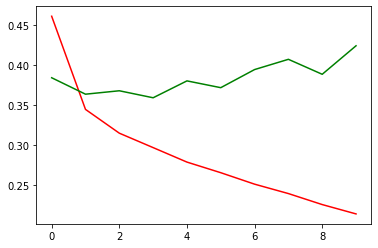

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.show()

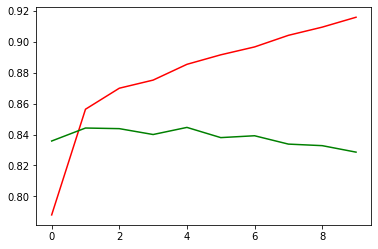

In [0]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')
plt.show()

In [0]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8286
